In [4]:
import json
import pandas as pd
import os
import matplotlib.pyplot as plt

# 1) JSON direkt einlesen (Liste von Dicts)
df_4_1 = pd.read_json("log_files/gpt-4.1_embedding_approach_v2.json")
#df_o_4 = pd.read_json("log_files/o4-mini_embedding_approach_v1.json")

def preprocess_df(df):
    df["timestamp"] = pd.to_datetime(df["timestamp"])
    #df["temperature"] = df["temperature"].astype(float)
    for col in ["dqr_original","dqr_predict","prompt_tokens","completion_tokens"]:
        df[col] = pd.to_numeric(df[col])


    #df.drop('temperature', axis=1, inplace=True)
    #df.drop('prompt_tokens', axis=1, inplace=True)
    df.drop('completion_tokens', axis=1, inplace=True)
    df['correct_pred'] = df['dqr_original'] == df['dqr_predict']

preprocess_df(df_4_1)
#preprocess_df(df_o_4)

In [5]:
print(f"{sum(df_4_1['estimated_costs'])} €")
print(f"{sum(df_4_1['estimated_costs']) / 165 * 4500} €")
df_4_1

0.6592639999999771 €
17.979927272726645 €


,ID,timestamp,model,vorname,nachname,dqr_original,comment_original,dqr_predict,comment_predict,prompt_tokens,estimated_costs,retrieved_content,correct_pred
0,#001,2025-08-10 13:50:48.284539,gpt-4.1,Joschka,Fischer,3,Mittlerer Schulabschluss,3,"Gymnasium ohne Abschluss, abgebrochene Lehre a...",2123,0.004366,Herkunft und Jugend[Bearbeiten | Quelltext bea...,True
1,#002,2025-08-10 13:50:52.374073,gpt-4.1,Hans,Klein,3,Mittlerer Schulabschluss,0,Keine Angabe zum Bildungsabschluss,1565,0.003194,Seit 1972 war er Mitglied der CSU.,False
2,#003,2025-08-10 13:50:58.975730,gpt-4.1,Alex,Möller,3,Mittlerer Schulabschluss (MSA),0,Keine Angabe zum Bildungsabschluss. Abschnitt ...,1878,0.003932,"Tatort Politik. Droemer Knaur, München u. a. 1...",False
3,#006,2025-08-10 13:51:03.409505,gpt-4.1,Theodor,Blank,4,Theodor Blank,0,Keine Angabe zum Bildungsabschluss,1589,0.003242,Joseph-Theodor ist ein Neffe des ersten Vertei...,False
4,#007,2025-08-10 13:51:07.404281,gpt-4.1,Kurt,Bodewig,4,Fachgebundene Hochschulreife,4,Fachabitur (Fachhochschulreife) nach Fachobers...,1875,0.003910,Nach der Mittleren Reife begann Bodewig eine A...,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,#190,2025-08-10 14:31:19.990660,gpt-4.1,Karl,Weber,8,Dr. jur.,8,Dr. der Rechtswissenschaft (Promotion),1766,0.003612,Nach dem Abitur 1916 nahm Weber zunächst als S...,True
161,#191,2025-08-10 14:31:35.185873,gpt-4.1,Guido,Westerwelle,8,Dr. jur.,8,Promotion zum Dr. iur. (Rechtswissenschaften),2099,0.004318,Kindheit und Ausbildung[Bearbeiten | Quelltext...,True
162,#193,2025-08-10 14:31:38.610527,gpt-4.1,Dorothee,Wilms,8,Dr. rer. pol.,8,Promotion zur Dr. rer. pol. (Volkswirtschaftsl...,1856,0.003840,Wilms wurde 1929 als einziges Kind von Lorenz ...,True
163,#194,2025-08-10 14:31:50.647691,gpt-4.1,Manfred,Wörner,8,Dr. jur.,8,Promotion zum Dr. jur.,2195,0.004454,"Herkunft, Studium und Beruf[Bearbeiten | Quell...",True


In [16]:
print(f"{sum(df_o_4['estimated_costs'])} €")
print(f"{sum(df_o_4['estimated_costs']) / 165 * 4500} €")
df_o_4

0.7325515999999987 €
19.978679999999965 €


,ID,timestamp,model,vorname,nachname,dqr_original,comment_original,dqr_predict,comment_predict,prompt_tokens,estimated_costs,retrieved_content,correct_pred
0,#001,2025-08-02 16:02:24.456168,o4-mini,Joschka,Fischer,3,Mittlerer Schulabschluss,0,Keine Angabe zum Bildungsabschluss,5752,0.007850,Herkunft und Jugend[Bearbeiten | Quelltext bea...,False
1,#002,2025-08-02 16:02:38.381913,o4-mini,Hans,Klein,3,Mittlerer Schulabschluss,4,Schriftsetzerlehre (duale Berufsausbildung),1747,0.005723,Klein kam 1945 als Heimatvertriebener aus dem ...,False
2,#003,2025-08-02 16:02:56.031850,o4-mini,Alex,Möller,3,Mittlerer Schulabschluss (MSA),0,Keine Angabe zum Bildungsabschluss,2771,0.004007,Herkunft und beruflicher Werdegang (bis 1945)[...,False
3,#006,2025-08-02 16:03:05.480278,o4-mini,Theodor,Blank,4,Theodor Blank,8,Promotion zum Dr. jur.,1903,0.003902,Joseph-Theodor Blank wuchs im ehemaligen Stadt...,False
4,#007,2025-08-02 16:03:13.911922,o4-mini,Kurt,Bodewig,4,Fachgebundene Hochschulreife,4,Fachhochschulreife (Fachabitur),1664,0.003098,Nach der Mittleren Reife begann Bodewig eine A...,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,#190,2025-08-02 16:25:46.291588,o4-mini,Karl,Weber,8,Dr. jur.,8,Dr. der Rechte,1555,0.003506,Nach dem Abitur 1916 nahm Weber zunächst als S...,True
161,#191,2025-08-02 16:25:52.840619,o4-mini,Guido,Westerwelle,8,Dr. jur.,8,"Dr. der Rechtswissenschaften (Promotion, Dr. i...",4526,0.005973,Kindheit und Ausbildung[Bearbeiten | Quelltext...,True
162,#193,2025-08-02 16:25:59.022726,o4-mini,Dorothee,Wilms,8,Dr. rer. pol.,8,Dr. rer. pol.,1645,0.002496,Wilms wurde 1929 als einziges Kind von Lorenz ...,True
163,#194,2025-08-02 16:26:06.220187,o4-mini,Manfred,Wörner,8,Dr. jur.,8,Ehrendoktorwürde (Honorary Doctorate),1547,0.002969,Verleihung der Ehrendoktorwürde der Troy State...,True


In [6]:
df_4_1_false = df_4_1[df_4_1['correct_pred'] == False]
df_4_1_false

,ID,timestamp,model,vorname,nachname,dqr_original,comment_original,dqr_predict,comment_predict,prompt_tokens,estimated_costs,retrieved_content,correct_pred
1,#002,2025-08-10 13:50:52.374073,gpt-4.1,Hans,Klein,3,Mittlerer Schulabschluss,0,Keine Angabe zum Bildungsabschluss,1565,0.003194,Seit 1972 war er Mitglied der CSU.,False
2,#003,2025-08-10 13:50:58.975730,gpt-4.1,Alex,Möller,3,Mittlerer Schulabschluss (MSA),0,Keine Angabe zum Bildungsabschluss. Abschnitt ...,1878,0.003932,"Tatort Politik. Droemer Knaur, München u. a. 1...",False
3,#006,2025-08-10 13:51:03.409505,gpt-4.1,Theodor,Blank,4,Theodor Blank,0,Keine Angabe zum Bildungsabschluss,1589,0.003242,Joseph-Theodor ist ein Neffe des ersten Vertei...,False
10,#013,2025-08-10 13:52:28.855639,gpt-4.1,Georg,Leber,4,Maurerlehre,0,Keine Angabe zum Bildungsabschluss. Vermutlich...,1640,0.003400,Vermögensbildung in Arbeitnehmerhand – Ein Pro...,False
11,#014,2025-08-10 13:52:35.675050,gpt-4.1,Paul,Lücke,4,Schlosser Lehre,0,Keine Angabe zum Bildungsabschluss. Vermutlich...,1621,0.003442,Ehrenmitglied der Katholischen Studentenverbin...,False
19,#022,2025-08-10 13:53:53.387961,gpt-4.1,Richard,Stücklen,4,Ausbildung Elektroingenieur,0,Keine Angabe zum Bildungsabschluss. Abschnitt ...,1752,0.003672,"Ehrenbürger der Stadt Weißenburg in Bayern, He...",False
24,#030,2025-08-10 13:54:25.444652,gpt-4.1,Michael,Glos,6,Meister im Müllerhandwerk,0,Keine Angabe zum Bildungsabschluss,1570,0.003204,"Michael Glos ist katholisch, verheiratet und h...",False
37,#047,2025-08-10 13:56:10.882871,gpt-4.1,Herta,Däubler-Gmelin,7,2tes Staatsexam Rechtswissenschaften,8,Promotion zum Dr. jur. (Rechtswissenschaften),1920,0.003952,Herta Däubler-Gmelin ist die Tochter von Helge...,False
42,#054,2025-08-10 13:57:01.694638,gpt-4.1,Andrea,Fischer,7,Diplom Volkswirtschaftslehre (Univ.),6,Studium der Volkswirtschaftslehre (Bachelor od...,2072,0.004264,Ausbildung und Beruf[Bearbeiten | Quelltext be...,False
45,#058,2025-08-10 13:58:23.367136,gpt-4.1,Hans-Dietrich,Genscher,7,2tes juristisches Staatsexam,6,Erstes juristisches Staatsexamen,2110,0.004300,Ausbildung[Bearbeiten | Quelltext bearbeiten] ...,False


In [18]:
df_o_4_false = df_o_4[df_o_4['correct_pred'] == False]
df_o_4_false

,ID,timestamp,model,vorname,nachname,dqr_original,comment_original,dqr_predict,comment_predict,prompt_tokens,estimated_costs,retrieved_content,correct_pred
0,#001,2025-08-02 16:02:24.456168,o4-mini,Joschka,Fischer,3,Mittlerer Schulabschluss,0,Keine Angabe zum Bildungsabschluss,5752,0.007850,Herkunft und Jugend[Bearbeiten | Quelltext bea...,False
1,#002,2025-08-02 16:02:38.381913,o4-mini,Hans,Klein,3,Mittlerer Schulabschluss,4,Schriftsetzerlehre (duale Berufsausbildung),1747,0.005723,Klein kam 1945 als Heimatvertriebener aus dem ...,False
2,#003,2025-08-02 16:02:56.031850,o4-mini,Alex,Möller,3,Mittlerer Schulabschluss (MSA),0,Keine Angabe zum Bildungsabschluss,2771,0.004007,Herkunft und beruflicher Werdegang (bis 1945)[...,False
3,#006,2025-08-02 16:03:05.480278,o4-mini,Theodor,Blank,4,Theodor Blank,8,Promotion zum Dr. jur.,1903,0.003902,Joseph-Theodor Blank wuchs im ehemaligen Stadt...,False
6,#009,2025-08-02 16:03:33.206887,o4-mini,Aenne,Brauksiepe,4,Allgemeine Hochschulreife (AHR),0,Keine Angabe zum Bildungsabschluss,1429,0.002531,1968: Verdienstkreuz 1. Klasse der Bundesrepub...,False
17,#020,2025-08-02 16:05:35.469354,o4-mini,Kurt,Schmücker,4,"Buchdruckerlehre, Jounralistische und verleger...",8,Ehrendoktorwürde (Dr. phil. oec. h. c.),1422,0.004266,1965: Päpstlicher Ritterorden des heiligen Gre...,False
19,#022,2025-08-02 16:05:54.712032,o4-mini,Richard,Stücklen,4,Ausbildung Elektroingenieur,6,Abschluss als Elektroingenieur an der Ingenieu...,1652,0.004220,Richard Stücklen wurde als Sohn des Schlosserm...,False
23,#027,2025-08-02 16:06:32.593361,o4-mini,Hans-Jürgen,Wischnewski,4,Allgemeine Hochschulreife (AHR),0,Keine Angabe zum Bildungsabschluss,1529,0.002360,Hans-Jürgen Wischnewski war Briefmarkensammler...,False
24,#030,2025-08-02 16:06:40.426101,o4-mini,Michael,Glos,6,Meister im Müllerhandwerk,0,Keine Angabe zum Bildungsabschluss,1477,0.002584,Glos ist seit 1970 Mitglied der CSU und war 19...,False
26,#032,2025-08-02 16:07:03.911416,o4-mini,Hubertus,Heil,6,Fernstudium Politologie und Soziologie,7,Abschluss eines Universitätsstudiums in Politi...,1599,0.004755,Heil wurde am Hubertustag 1972 als Sohn einer ...,False


In [23]:
df_false_enriched_4_1 = pd.read_json("log_files/incorrect_predictions4.1.json")
df_false_enriched_4_1

,ID,timestamp,vorname,nachname,dqr_original,comment_original,dqr_predict,comment_predict,prompt_tokens,estimated_costs,retrieved_content,correct_pred,correct_retrieval,mistake_reason
0,#001,2025-08-02 13:30:53.843529,Joschka,Fischer,3,Mittlerer Schulabschluss,0,Keine Angabe zum Bildungsabschluss. Fischer ve...,5753,0.011706,Herkunft und Jugend[Bearbeiten | Quelltext bea...,False,True,classification
1,#003,2025-08-02 13:31:03.225346,Alex,Möller,3,Mittlerer Schulabschluss (MSA),0,Keine Angabe zum Bildungsabschluss,2772,0.005608,Herkunft und beruflicher Werdegang (bis 1945)[...,False,True,wiki_data
2,#006,2025-08-02 13:31:06.895578,Theodor,Blank,4,Theodor Blank,8,Promotion zum Dr. jur.,1904,0.003872,Joseph-Theodor Blank wuchs im ehemaligen Stadt...,False,True,actually_correct
3,#009,2025-08-02 13:31:19.886205,Aenne,Brauksiepe,4,Allgemeine Hochschulreife (AHR),0,Keine Angabe zum Bildungsabschluss,1430,0.002924,1968: Verdienstkreuz 1. Klasse der Bundesrepub...,False,False,retrieval
4,#017,2025-08-02 13:31:52.129055,Hannelore,Rönsch,4,Fachhochschulreife,3,Mittlere Reife (mittlerer Schulabschluss),1529,0.003162,Rönschs Vater war Landwirt und Winzer. Er star...,False,True,classification
5,#020,2025-08-02 13:32:03.639174,Kurt,Schmücker,4,"Buchdruckerlehre, Jounralistische und verleger...",8,Ehrendoktorwürde (Dr. phil oec. h. c.),1423,0.002998,1965: Päpstlicher Ritterorden des heiligen Gre...,False,False,retrieval
6,#022,2025-08-02 13:32:12.447073,Richard,Stücklen,4,Ausbildung Elektroingenieur,6,Abschluss als Elektroingenieur an einer Ingeni...,1653,0.003450,Richard Stücklen wurde als Sohn des Schlosserm...,False,True,classification
7,#027,2025-08-02 13:32:28.829715,Hans-Jürgen,Wischnewski,4,Allgemeine Hochschulreife (AHR),0,Keine Angabe zum Bildungsabschluss,1530,0.003124,Hans-Jürgen Wischnewski war Briefmarkensammler...,False,False,retrieval
8,#030,2025-08-02 13:32:32.256532,Michael,Glos,6,Meister im Müllerhandwerk,0,Keine Angabe zum Bildungsabschluss,1478,0.003020,Glos ist seit 1970 Mitglied der CSU und war 19...,False,False,retrieval
9,#047,2025-08-02 13:33:29.111789,Herta,Däubler-Gmelin,7,2tes Staatsexam Rechtswissenschaften,0,Keine Angabe zum Bildungsabschluss,1697,0.003458,1989 gründete sie zusammen mit Peter Becker di...,False,False,retrieval


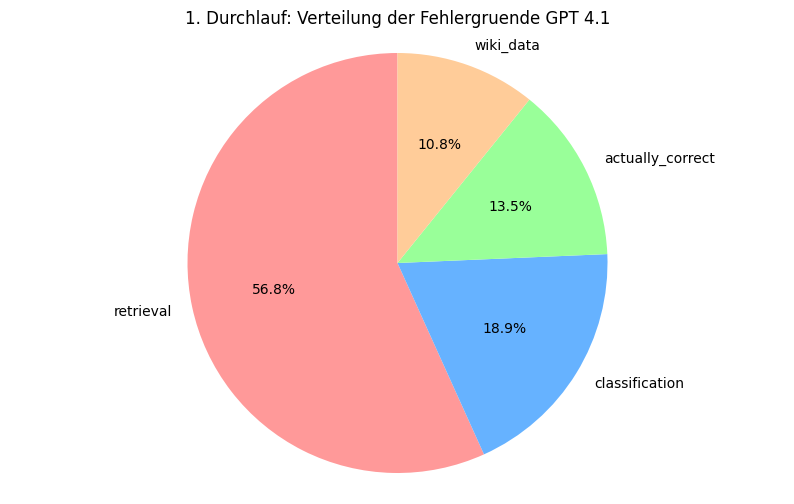

In [26]:
# Visualisierung 2: Fehlergrund-Verteilung
mistake_counts = df_false_enriched_4_1['mistake_reason'].value_counts()

plt.figure(figsize=(10, 6))
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99']
plt.pie(mistake_counts, labels=mistake_counts.index, autopct='%1.1f%%',
        colors=colors, startangle=90)
plt.title('1. Durchlauf: Verteilung der Fehlergruende GPT 4.1')
plt.axis('equal')
plt.show()

In [24]:
df_false_enriched_o4 = pd.read_json("log_files/incorrect_predictions_o4-mini.json")
df_false_enriched_o4

,ID,timestamp,model,vorname,nachname,dqr_original,comment_original,dqr_predict,comment_predict,prompt_tokens,estimated_costs,retrieved_content,correct_pred,correct_retrieval,mistake_reason
0,#001,2025-08-02 16:02:24.456168,o4-mini,Joschka,Fischer,3,Mittlerer Schulabschluss,0,Keine Angabe zum Bildungsabschluss,5752,0.007850,Herkunft und Jugend[Bearbeiten | Quelltext bea...,False,True,classification
1,#002,2025-08-02 16:02:38.381913,o4-mini,Hans,Klein,3,Mittlerer Schulabschluss,4,Schriftsetzerlehre (duale Berufsausbildung),1747,0.005723,Klein kam 1945 als Heimatvertriebener aus dem ...,False,True,actually_correct
2,#003,2025-08-02 16:02:56.031850,o4-mini,Alex,Möller,3,Mittlerer Schulabschluss (MSA),0,Keine Angabe zum Bildungsabschluss,2771,0.004007,Herkunft und beruflicher Werdegang (bis 1945)[...,False,True,wiki_data
3,#006,2025-08-02 16:03:05.480278,o4-mini,Theodor,Blank,4,Theodor Blank,8,Promotion zum Dr. jur.,1903,0.003902,Joseph-Theodor Blank wuchs im ehemaligen Stadt...,False,True,actually_correct
4,#009,2025-08-02 16:03:33.206887,o4-mini,Aenne,Brauksiepe,4,Allgemeine Hochschulreife (AHR),0,Keine Angabe zum Bildungsabschluss,1429,0.002531,1968: Verdienstkreuz 1. Klasse der Bundesrepub...,False,False,retrieval
5,#020,2025-08-02 16:05:35.469354,o4-mini,Kurt,Schmücker,4,"Buchdruckerlehre, Jounralistische und verleger...",8,Ehrendoktorwürde (Dr. phil. oec. h. c.),1422,0.004266,1965: Päpstlicher Ritterorden des heiligen Gre...,False,False,retrieval
6,#022,2025-08-02 16:05:54.712032,o4-mini,Richard,Stücklen,4,Ausbildung Elektroingenieur,6,Abschluss als Elektroingenieur an der Ingenieu...,1652,0.004220,Richard Stücklen wurde als Sohn des Schlosserm...,False,True,classification
7,#027,2025-08-02 16:06:32.593361,o4-mini,Hans-Jürgen,Wischnewski,4,Allgemeine Hochschulreife (AHR),0,Keine Angabe zum Bildungsabschluss,1529,0.002360,Hans-Jürgen Wischnewski war Briefmarkensammler...,False,False,retrieval
8,#030,2025-08-02 16:06:40.426101,o4-mini,Michael,Glos,6,Meister im Müllerhandwerk,0,Keine Angabe zum Bildungsabschluss,1477,0.002584,Glos ist seit 1970 Mitglied der CSU und war 19...,False,False,retrieval
9,#032,2025-08-02 16:07:03.911416,o4-mini,Hubertus,Heil,6,Fernstudium Politologie und Soziologie,7,Abschluss eines Universitätsstudiums in Politi...,1599,0.004755,Heil wurde am Hubertustag 1972 als Sohn einer ...,False,True,actually_correct


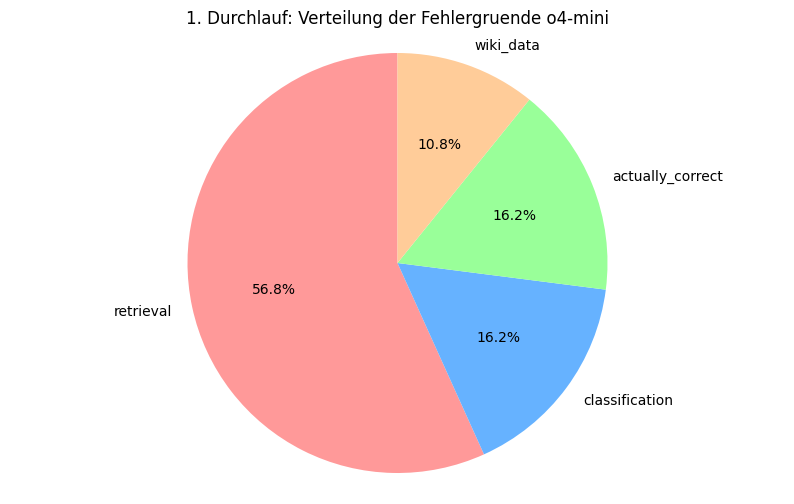

In [27]:
# Visualisierung 2: Fehlergrund-Verteilung
mistake_counts = df_false_enriched_o4['mistake_reason'].value_counts()

plt.figure(figsize=(10, 6))
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99']
plt.pie(mistake_counts, labels=mistake_counts.index, autopct='%1.1f%%',
        colors=colors, startangle=90)
plt.title('1. Durchlauf: Verteilung der Fehlergruende o4-mini')
plt.axis('equal')
plt.show()